## Importing Libraries

In [1]:
import split_folders
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import metrics
from keras.preprocessing import image
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
os.listdir('/home/ipc-admin/Documents/NOME/vehicledetected-stanford-cars-data-classes-folder/stanford-car-dataset-by-classes-folder/car_data/car_data')

['train', 'test']

Text(0.5, 1.0, 'This is my car Picture')

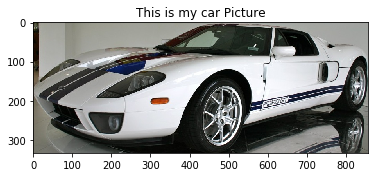

In [25]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/vehicledetected-stanford-cars-data-classes-folder/stanford-car-dataset-by-classes-folder/car_data/car_data/test/Ford GT Coupe/08005.jpg')
plt.imshow(test_image)
plt.title('This is my car Picture')

### Rescaling my data

In [3]:
traindata = ImageDataGenerator(rescale=1./255)
testdata = ImageDataGenerator(rescale=1./255)

### Retrieving Data from train , test and val directory 
### Setting the image size to 64x64 pixels

In [4]:
trainingdata = traindata.flow_from_directory('/home/ipc-admin/Documents/NOME/vehicledetected-stanford-cars-data-classes-folder/stanford-car-dataset-by-classes-folder/car_data/car_data/train',
                                             batch_size=32,
                                             target_size=(64,64),
                                             class_mode=('categorical') 
                                            )

test_set = testdata.flow_from_directory('/home/ipc-admin/Documents/NOME/vehicledetected-stanford-cars-data-classes-folder/stanford-car-dataset-by-classes-folder/car_data/car_data/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8144 images belonging to 189 classes.
Found 8041 images belonging to 189 classes.


### Making a Convolutional Neural Network Model

In [5]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'softmax', units = 189))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Feeding Data to the CNN Model

In [6]:
cnn_model = cnn.fit_generator(trainingdata,
                         steps_per_epoch = 80,
                         epochs = 5,
                         )

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
80/80 [==============================] - 13s 167ms/step - loss: 0.0330 - acc: 0.9947
Epoch 2/5
80/80 [==============================] - 13s 164ms/step - loss: 0.0327 - acc: 0.9947
Epoch 3/5
80/80 [==============================] - 13s 164ms/step - loss: 0.0325 - acc: 0.9947
Epoch 4/5
80/80 [==============================] - 13s 160ms/step - loss: 0.0320 - acc: 0.9947
Epoch 5/5
80/80 [==============================] - 13s 161ms/step - loss: 0.0316 - acc: 0.9947


### Test Accuracy

In [7]:
test_accu = cnn.evaluate_generator(test_set,steps=500)

print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 99.47073590795009 %


### Test Image

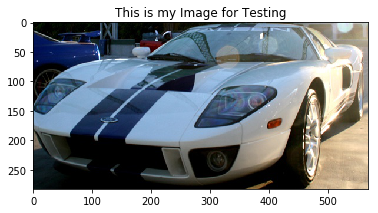

In [18]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/vehicledetected-stanford-cars-data-classes-folder/stanford-car-dataset-by-classes-folder/car_data/car_data/test/Ford GT Coupe/01033.jpg')
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((64, 64), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

### Predicting test image

In [19]:
value = cnn.predict_classes(test_image)

In [20]:
value

array([16])